<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Introdução ao Gradiente Descendente
---

## Introdução ao Pré-processamento de Imagens

- item 1
- item 2 
- item 3

## Conjuntos de Dados

Vamos gerar um conjunto de dados para usar em classificação:
* Importamos a função `make_blobs` da biblioteca `sklearn` e geramos duas bolhas de dados

In [93]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.8, random_state=0)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [191]:
import pandas as pd
data = pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']), 
    pd.DataFrame(y, columns=['class'])
    ], 
    axis = 1 )

In [192]:
data.head()

,x1,x2,class
0,0.965010,0.422201,1
1,0.438237,0.211767,1
2,0.206877,0.860851,0
3,0.264954,0.533723,0
4,0.809843,0.301280,1


Vamos criar uma função para mostrar os pontos em um plot do `matplotlib` que iremos usar posteriormente 

In [340]:
import seaborn as sns
def plot_points(data, ax):
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    sns.scatterplot(x='x1', y='x2', style='class', hue='class', ax = ax, data = data)   

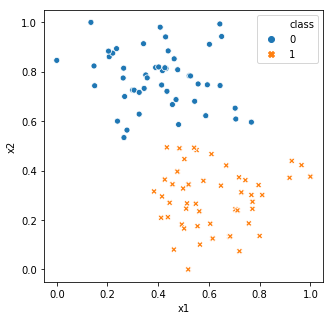

In [341]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
plot_points(data, ax)
plt.show()

Vamos criar uma função para mostrar uma reta nesse espaço a partir dos coeficientes da função da reta $f(x) = a x + b$

In [342]:
def plot_line(a,b,ax, color="green"):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-2, 2, 0.1)
    f_x = a * x + b    
    sns.lineplot(x=x, y=f_x, color=color, ax = ax)

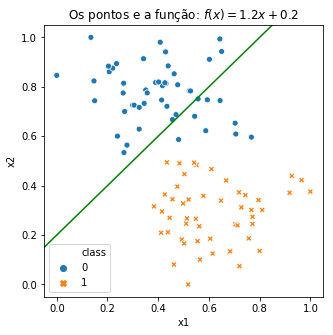

In [343]:
fig, ax = plt.subplots(figsize=(5,5))
plot_points(data, ax)
plot_line(1,0.2,ax)
plt.title(r'Os pontos e a função: $f(x) = 1.2 x + 0.2$')
plt.show()

In [344]:
def plot_points_and_lines(data, a, b, ax):
    plot_points(data, ax)
    plot_line(a, b, ax)
    ax.title.set_text(r'Os pontos e a função: $f(x1) = %.2f x + %.2f$' % (a,b) )

### Testando algumas funções de reta

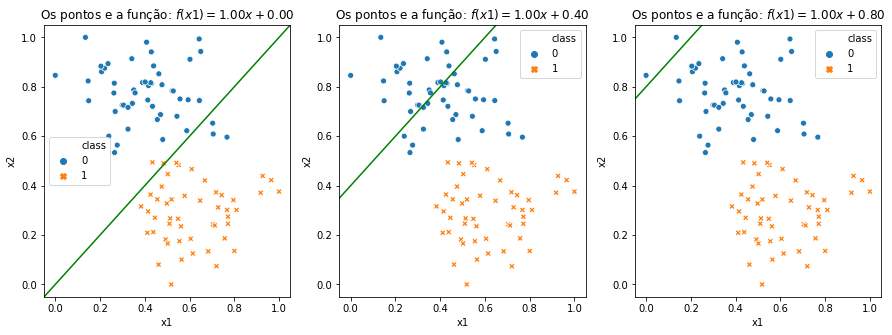

In [345]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
plot_points_and_lines(data, 1.0, 0.0, ax1)
plot_points_and_lines(data, 1.0, 0.4, ax2)
plot_points_and_lines(data, 1.0, 0.8, ax3)

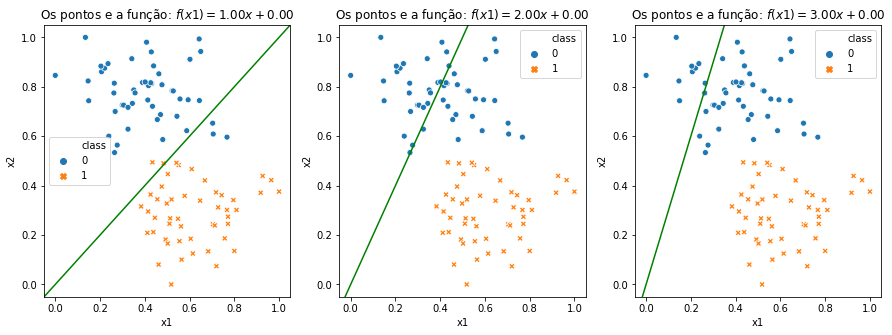

In [346]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
plot_points_and_lines(data, 1.0, 0.0, ax1)
plot_points_and_lines(data, 2.0, 0.0, ax2)
plot_points_and_lines(data, 3.0, 0.0, ax3)

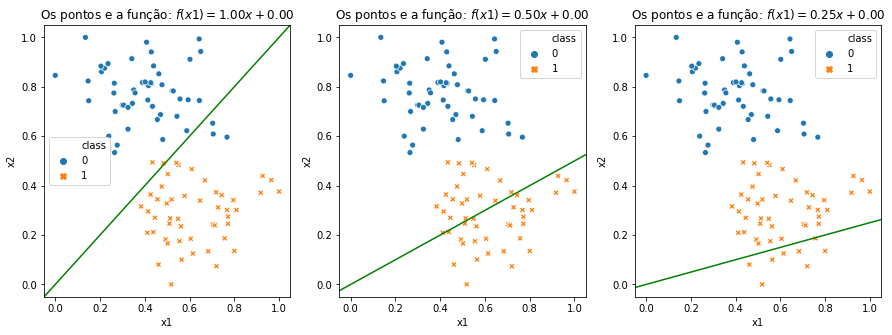

In [347]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
plot_points_and_lines(data, 1.0, 0.0, ax1)
plot_points_and_lines(data, 0.5, 0.0, ax2)
plot_points_and_lines(data, 0.25, 0.0, ax3)

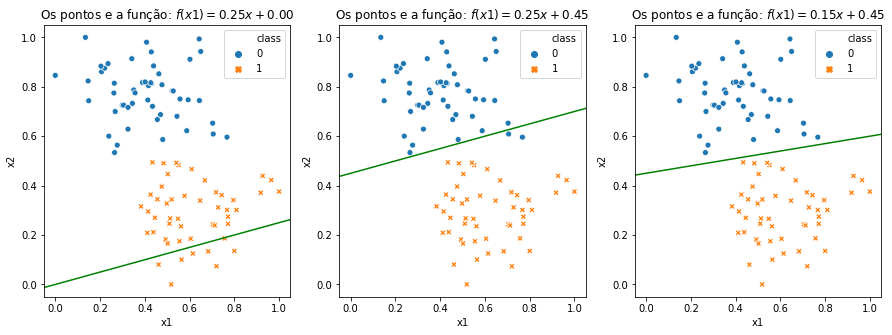

In [348]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
plot_points_and_lines(data, 0.25, 0.0, ax1)
plot_points_and_lines(data, 0.25, 0.45, ax2)
plot_points_and_lines(data, 0.15, 0.45, ax3)

### X

Ao olhar para os dados fomos mudando os valores da função até que encontramos uma função que divide de forma legal os pontos das duas classes. No fundo nós estâvamos procurando não uma função $f(x_1) = a x_1 + b$ qualquer, mas uma função $f(x1,x2) = a_1 x_1 + a_2 x_2 + b$

In [333]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y, ax):
    data = pd.concat( [
            pd.DataFrame(X,columns=['x1','x2']), 
            pd.DataFrame(y, columns=['class'])
        ], 
        axis = 1 )
    sns.relplot(x=X[0], y=[1], hue='class', data = data, ax = ax)
    return ax

def display(m, b, color='g--'):    
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    fig, ax = plt.subplots(figsize=(6,6))
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary

    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets, ax)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.8236134685052845
Accuracy:  0.1

========== Epoch 10 ==========
Train loss:  0.6369090265227446
Accuracy:  0.85

========== Epoch 20 ==========
Train loss:  0.5180444958622212
Accuracy:  0.96

========== Epoch 30 ==========
Train loss:  0.43748879361543674
Accuracy:  0.97

========== Epoch 40 ==========
Train loss:  0.3806080777879407
Accuracy:  0.97

========== Epoch 50 ==========
Train loss:  0.33876433807933487
Accuracy:  0.97

========== Epoch 60 ==========
Train loss:  0.3068511529006884
Accuracy:  0.97

========== Epoch 70 ==========
Train loss:  0.2817586131505605
Accuracy:  0.97

========== Epoch 80 ==========
Train loss:  0.2615205023717164
Accuracy:  0.97

========== Epoch 90 ==========
Train loss:  0.2448466797870955
Accuracy:  0.97


ValueError: arrays must all be same length

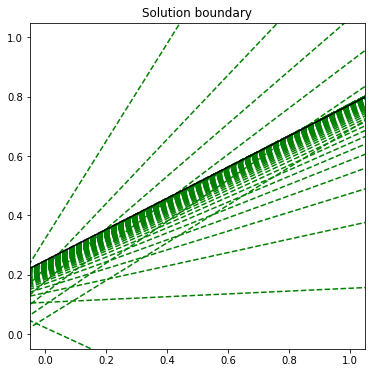

In [134]:
train(X, y, epochs, learnrate, True)